In [1]:
from sklearn.linear_model import LinearRegression  # for Logistic Regression algorithm
from sklearn.cross_validation import train_test_split #to split the dataset for training and testing
from sklearn import metrics #for checking the model accuracy
from sklearn.tree import DecisionTreeClassifier #for using Decision Tree Algoithm
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier # A combine model of many decision trees
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn import datasets, linear_model
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn import tree
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
import sklearn
from matplotlib.colors import ListedColormap
sns.set(style="white", color_codes=True)
class MultiColumnLabelEncoder:
    def __init__(self,columns = None):
        self.columns = columns # array of column names to encode

    def fit(self,X,y=None):
        return self # not relevant here

    def transform(self,X):
        '''
        Transforms columns of X specified in self.columns using
        LabelEncoder(). If no columns specified, transforms all
        columns in X.
        '''
        output = X.copy()
        if self.columns is not None:
            for col in self.columns:
                output[col] = LabelEncoder().fit_transform(output[col])
        else:
            for colname,col in output.iteritems():
                output[colname] = LabelEncoder().fit_transform(col)
        return output

    def fit_transform(self,X,y=None):
        return self.fit(X,y).transform(X)


/home/deepak/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
train = pd.read_csv('train.csv');
#print ("Counts of mobile price range",train['G3'].value_counts()) #checking counts of each type  of output
#train = pd.get_dummies(train,columns=['Mjob', 'Fjob','reason'])
train=train.fillna(" ")
train = MultiColumnLabelEncoder(columns = ['id','alcohol_consumption','location_class','workstatus','residence_region','income','engagement_religion','response']).fit_transform(train)
train=train.replace(' ',np.NaN)
train=train.fillna(train.median())
print(train.head(19))
'''
train, test = train_test_split(train, test_size = 0.3, random_state=900)

train_x = train.iloc[:,0:17]
train_y = train.response # output of our training data
test_x = test.iloc[:,0:17]
test_y = test.response # output of our training data
print(train_x.head(5))
print("shape of train ",train_x.shape , train_y.shape) #checking dimension of various data frames
print("shape of test ",test_x.shape, test_y.shape)
'''

    id  alcohol_consumption  location_class  workstatus  score  divorce  \
0    0                    1               3           7   36.0      0.8   
1    1                    4               2           7   66.0      0.8   
2    2                    6               6           8   27.0      1.0   
3    3                    0               4           3   30.0      1.0   
4    4                    6               4           3   35.0      1.0   
5    5                    7               3           7   41.0      1.0   
6    6                    5               6           8   17.0      1.0   
7    7                    6               4           3   36.0      1.0   
8    8                    3               3           1   27.0      1.0   
9    9                    4               2           7   50.0      1.2   
10  10                    7               5           2   22.0      1.0   
11  11                    4               1           7   43.0      1.2   
12  12                   

'\ntrain, test = train_test_split(train, test_size = 0.3, random_state=900)\n\ntrain_x = train.iloc[:,0:17]\ntrain_y = train.response # output of our training data\ntest_x = test.iloc[:,0:17]\ntest_y = test.response # output of our training data\nprint(train_x.head(5))\nprint("shape of train ",train_x.shape , train_y.shape) #checking dimension of various data frames\nprint("shape of test ",test_x.shape, test_y.shape)\n'

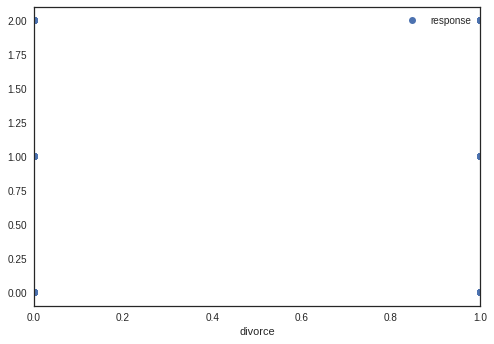

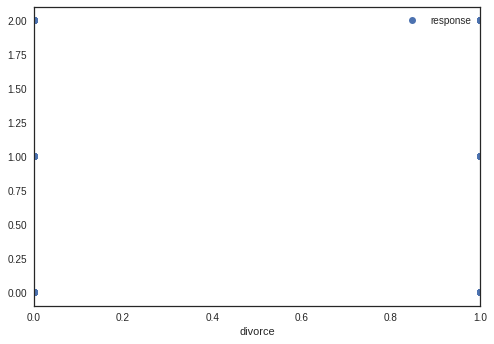

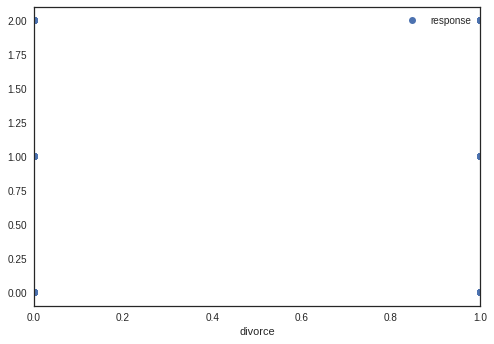

In [79]:
train.plot(x='divorce', y='response', style='o')
plt.show()

In [4]:
model = tree.DecisionTreeClassifier(min_samples_split=450)
model.fit(train.iloc[:,0:17],train.response)	

#prediction = model.predict(test_x)

#print('The accuracy of the decision tree is',accuracy_score(prediction,test_y))

test_rl=pd.read_csv('test.csv'); #now,reading actual test.csv file for predicting values
test_rl=test_rl.fillna(" ")
test_rl = MultiColumnLabelEncoder(columns = ['id','alcohol_consumption','location_class','workstatus','residence_region','income','engagement_religion']).fit_transform(test_rl)
test_rl=test_rl.replace(' ',np.NaN)
test_rl=test_rl.fillna(train.mean())
print(test_rl.head(5))
#test_rl = pd.get_dummies(test_rl,columns=['Mjob', 'Fjob','reason'])

#test_rl = MultiColumnLabelEncoder(columns = ['school','sex','address','famsize','Pstatus','guardian','schoolsup','famsup','paid','activities','nursery','higher','internet','romantic']).fit_transform(test_rl)

print("shape of test_real ",test_rl.shape) #checking dimensions

prediction_real=model.predict(test_rl) #predicting the output
#print("shape of prediction_real ",prediction_real.shape)

np.savetxt("answer1.csv", prediction_real, delimiter=",") #writing the prediction to a file

   id  alcohol_consumption  location_class  workstatus  score  divorce  \
0   0                    1               1           6   43.0      0.8   
1   1                    1               0           6   42.0      1.2   
2   2                    6               2           0   21.0      1.2   
3   3                    1               1           6   46.0      1.2   
4   4                    2               6           7   36.0      0.8   

   widowed  education  residence_region  babies  preteen  teens  income  \
0      1.0       12.0                 0     0.0      0.0    0.0       0   
1      1.0       12.0                 7     0.0      0.0    0.0       5   
2      0.8       13.0                 0     0.0      0.0    0.0       2   
3      1.2       12.0                 7     0.0      0.0    0.0       5   
4      1.2       12.0                 7     0.0      0.0    0.0       5   

   engagement_religion  x1   tvhours  gender  
0                    8   2  3.000000       0  
1         